# 7 Nonstationary Process

## 7.1 Introduction of ARIMA Process

If the data exhibits no apparent deviations from stationarity and has a rapidly decreasing autocorrelation function, we shall seek a suitable ARMA process to represent the mean-correlated data. If not, then we shall first look for a transformation of the data which generates a new series with the above properties. This can frequently be achieved by differencing, leading us to consider the class of ARIMA (autoregressive-integrated moving average) processes.

**Definition of intrinsically stationary process:**  
A stochastic process $\{X_t\}$ is said to be intrinsically stationary of integer order $d > 0$ if $\{X_t\}, \{\nabla X_t\}, \ldots, \{\nabla^{d-1} X_t\}$ are non-stationary, but $\{\nabla^d X_t\}$ is a stationary process.

Note that:

- $\nabla X_t = (1 - B)X_t = X_t - X_{t-1}$
- $\nabla^2 X_t = \nabla(\nabla X_t) = (1 - B)^2 X_t = (X_t - X_{t-1}) - (X_{t-1} - X_{t-2}) = X_t - 2X_{t-1} + X_{t-2}$
- $\vdots$
- $\nabla^d X_t = (1 - B)^d X_t = \sum_{k=0}^{d} \binom{d}{k} (-1)^k B^k X_t = \sum_{k=0}^{d} \binom{d}{k} (-1)^k X_{t-k}$

Any stationary process is intrinsically stationary of order $d = 0$.

**Definition of the ARIMA(p, d, q) process:**  
If $d$ is a non-negative integer, then $\{X_t\}$ is said to be an $ARIMA(p, d, q)$ process if:

1. $\{X_t\}$ is intrinsically stationary of order $d$, and  
2. $\{\nabla^d X_t\}$ is a causal $ARMA(p, q)$ process.

With $\{W_t\} \sim WN(0, \sigma^2)$, we can express the model as:

$$
\phi(B)(1 - B)^d X_t = \theta(B) W_t
$$

or equivalently, as:

$$
\phi^*(B) X_t = \theta(B) W_t
$$

where $\phi^*(B) = \phi(B)(1 - B)^d$, and $\phi(z)$ and $\theta(z)$ are polynomials of degrees $p$ and $q$, respectively, and $\phi(z) \ne 0$ for $|z| \le 1$.  

Note that if $d > 0$, then $\phi^*(z)$ has a zero of order $d$ at $z = 1$ (on the unit circle).

### Example 7.1

A simplest example of ARIMA process is $ARIMA(0, 1, 0)$:

$$
(1 - B)X_t = X_t - X_{t-1} = W_t
$$


For which, assuming existence of $X_0$ and $t \ge 1$:

- $X_1 = X_0 + W_1$
- $X_2 = X_1 + W_2 = X_0 + W_1 + W_2$
- $X_3 = X_2 + W_3 = X_0 + W_1 + W_2 + W_3$
- $\vdots$
- $X_t = X_0 + \sum_{k=1}^{t} W_k$

Above is a **random walk starting from** $X_0$. Assuming $X_0$ is uncorrelated with $W_t$'s, we have:

$$
\text{Var}(X_t) = \text{Var} \left( X_0 + \sum_{k=1}^{t} W_k \right) = \text{Var}(X_0) + \sum_{k=1}^{t} \text{Var}(W_k) = \text{Var}(X_0) + t\sigma^2
$$

which is either **time-dependent** or **infinite** if $\text{Var}(X_0) = \infty$.

Further:

$$
\text{Cov}(X_{t+h}, X_t) = \text{Cov} \left( X_0 + \sum_{k=1}^{t+h} W_k,\ X_0 + \sum_{k=1}^{t} W_k \right) = \text{Var}(X_0) + \min(t, t+h)\sigma^2
$$

Thus, **ARIMA(0, 1, 0) is a non-stationary process**. The same is true for all **ARIMA(p, d, q) processes** when $d$ is a positive integer.

A realization of white noise.


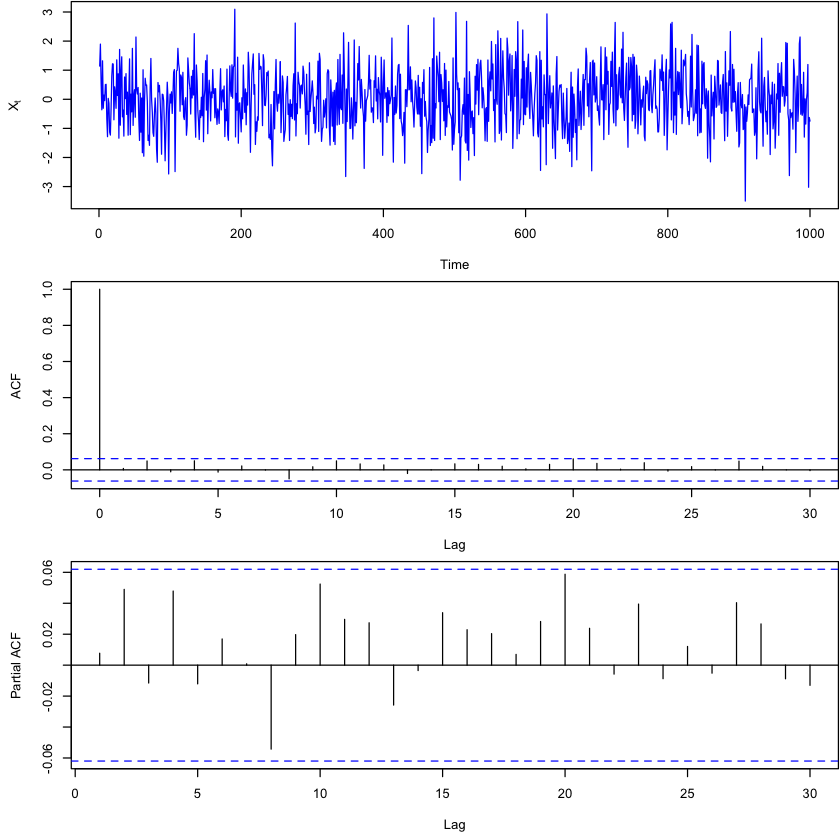

In [26]:
# Set the number of observations
N <- 1000

par(bg = "white")        

# Generate a white noise series
Wt <- rnorm(N, 0, 1)

# Set up the plotting area
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the white noise time series
plot.ts(Wt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Wt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Wt, type = "partial")


A realizaiton of random walk.

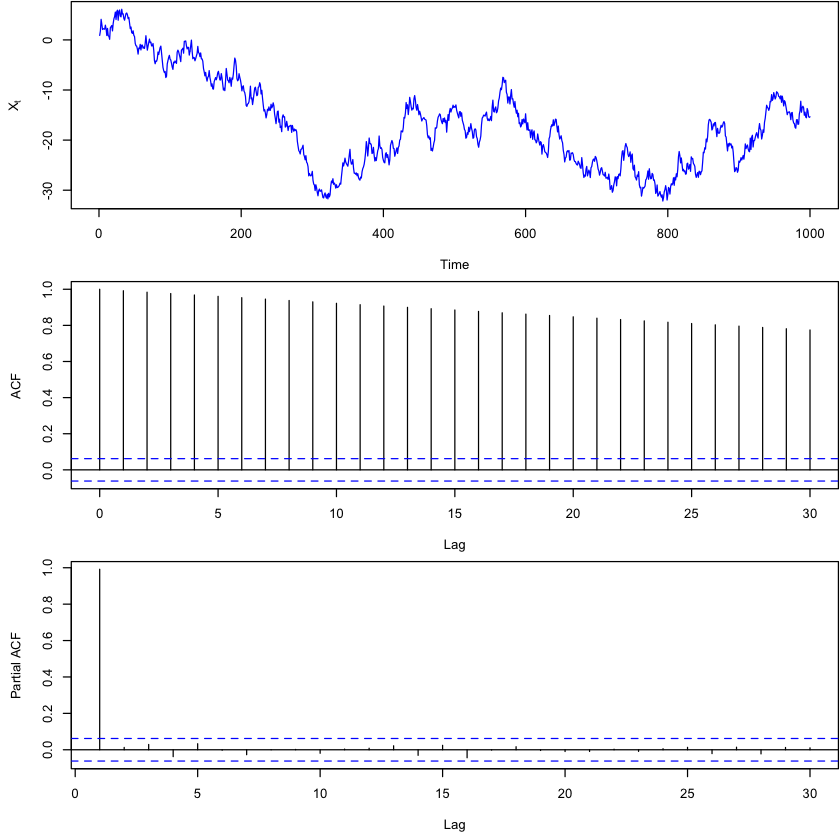

In [27]:
# Set the number of observations
N <- 1000

par(bg = "white")        

# Generate a white noise series
Wt <- rnorm(N, 0, 1)

# Generate a random walk by cumulatively summing the white noise
Xt <- cumsum(Wt)

# Set up the plotting area
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the random walk time series
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Xt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Xt, type = "partial")


Another realization of random walk.

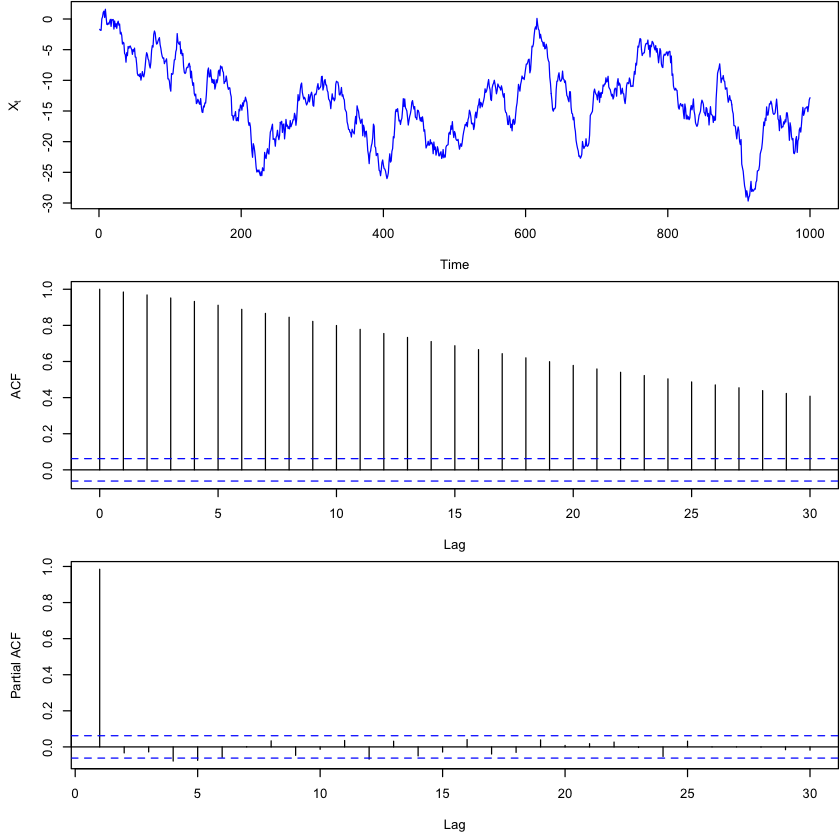

In [28]:
# Set the number of observations
N <- 1000

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Create a random walk by cumulative summation of white noise
Xt <- cumsum(Wt)

# Set up the plotting area: 3 plots in one column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))  # Margins

# Plot the random walk time series
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Xt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Xt, type = "partial")


### Example 7.2

$\{X_t\}$ is an ARIMA(1, 1, 0) process if for some $\phi \in (-1, 1)$,

$$(1 - \phi B)(1 - B)X_t = W_t,\quad \{W_t\} \sim WN(0, \sigma^2).$$

We can write $Y_t = (1 - B)X_t$ which is an AR(1), and thus

$$Y_t = \sum_{j=0}^\infty \phi^j W_{t-j}.$$

Back to $\{X_t\}$, we have

$$X_t - X_{t-1} = Y_t$$

and recursively,

$$X_t = X_0 + \sum_{j=1}^{t} Y_j,\quad t \geq 1.$$

Further,

\begin{align*}
\text{Var}(X_t) &= \text{Var}(X_0) + \text{Var}\left(\sum_{j=1}^{t} Y_j\right) \\
&= \text{Var}(X_0) + \sum_{i=1}^{t} \sum_{j=1}^{t} \text{Cov}(Y_i, Y_j) \\
&= \text{Var}(X_0) + \sum_{i=1}^{t} \sum_{j=1}^{t} \gamma_Y(i - j) \\
&= \text{Var}(X_0) + t \gamma_Y(0) + 2 \sum_{i=2}^{t} (t - i + 1)\gamma_Y(i - 1) \\
&= \text{Var}(X_0) + \gamma_Y(0)\left(t + 2 \sum_{i=2}^{t} (t - i + 1)\rho_Y(i - 1)\right) \\
&= \text{Var}(X_0) + \frac{\sigma^2}{1 - \phi^2} \left(t + 2 \sum_{i=2}^{t} (t - i + 1)\phi^{i - 1} \right)
\end{align*}


An realization of AR(1).

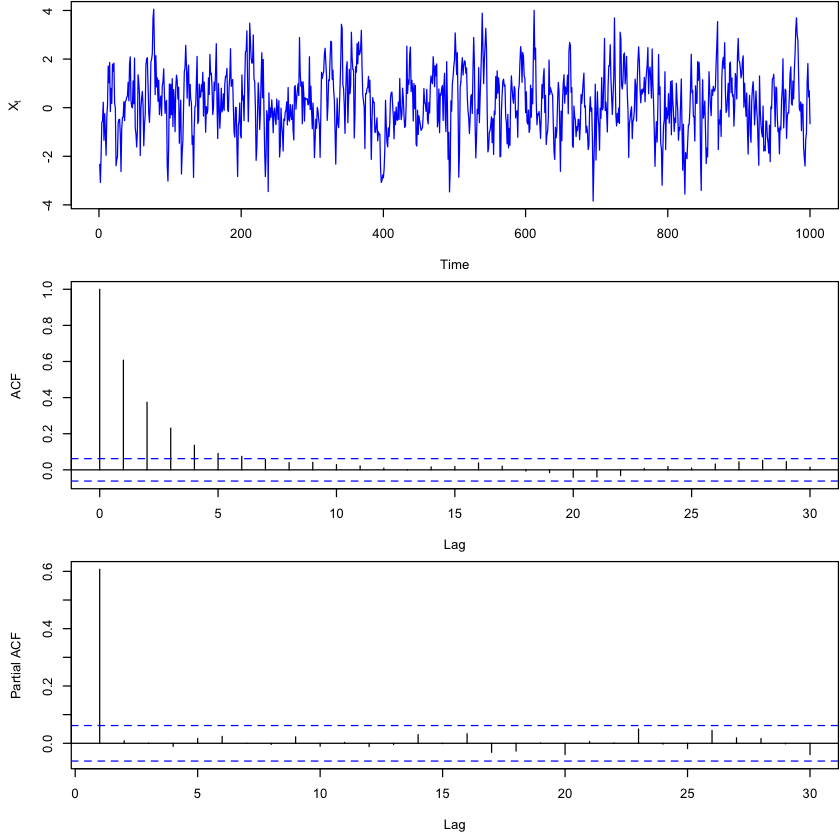

In [29]:
# Set the number of observations (with 50 extra for initial condition discard)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate an AR(1) process: Yt = 0.6 * Y_{t-1} + Wt
Yt <- filter(Wt, filter = c(0.6), method = "recursive")[-(1:50)]

# Set up plotting layout: 3 plots in one column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))  # Margins

# Plot the AR(1) time series
plot.ts(Yt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Yt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Yt, type = "partial")


An realization of ARIMA(1, 1, 0).

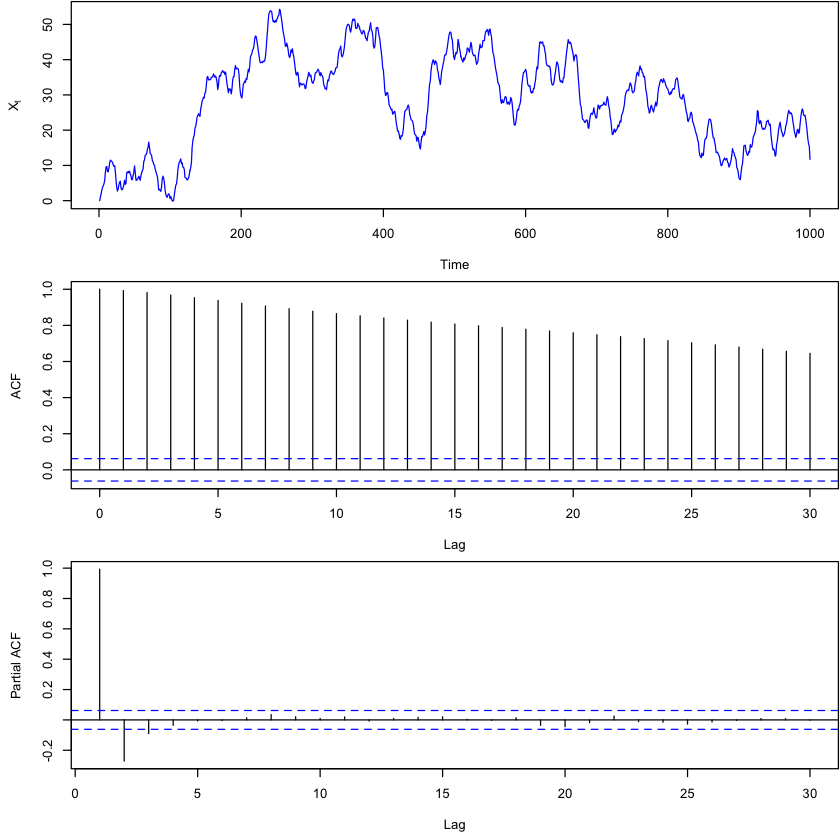

In [30]:
# Set the number of observations (including extra for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate an AR(1) process: Yt = 0.6 * Y_{t-1} + Wt
Yt <- filter(Wt, filter = c(0.6), method = "recursive")[-(1:50)]

# Create an integrated AR(1) process (i.e., ARIMA(1,1,0)) by cumulative sum
Xt <- cumsum(Yt)

# Set up plotting layout: 3 plots in a single column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))  # Set plot margins

# Plot the integrated AR(1) process
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Xt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Xt, type = "partial")


### Example 7.3

$\{X_t\}$ is an ARIMA(0, 1, 1) process, then

$$(1 - B)X_t = (1 + \theta B) W_t,\quad \{W_t\} \sim WN(0, \sigma^2).$$

We can write $Y_t = (1 + \theta B) W_t$ which is an MA(1), thus

$$X_t - X_{t-1} = Y_t$$

and recursively,

$$
X_t = X_0 + \sum_{j=1}^t Y_j = X_0 + \sum_{j=1}^t (W_j + \theta W_{j-1}).
$$

Then, if $X_0$ is uncorrelated with $Y_t$ s,

\begin{align*}
\text{Var}(X_t) &= \text{Var}(X_0) + \text{Var}\left(\sum_{j=1}^t Y_j\right) \\
&= \text{Var}(X_0) + \sum_{i=1}^t \sum_{j=1}^t \text{Cov}(Y_i, Y_j) \\
&= \text{Var}(X_0) + \sum_{i=1}^t \sum_{j=1}^t \gamma_Y(i - j) \\
&= \text{Var}(X_0) + t \gamma_Y(0) + 2 \sum_{i=2}^t (t - i + 1) \gamma_Y(i - 1) \\
&= \text{Var}(X_0) + t \gamma_Y(0) + 2 (t - 1) \gamma_Y(1) \\
&= \text{Var}(X_0) + t(1 + \theta^2) \sigma^2 + 2 (t - 1) \theta \sigma^2.
\end{align*}


An realization of MA(1).

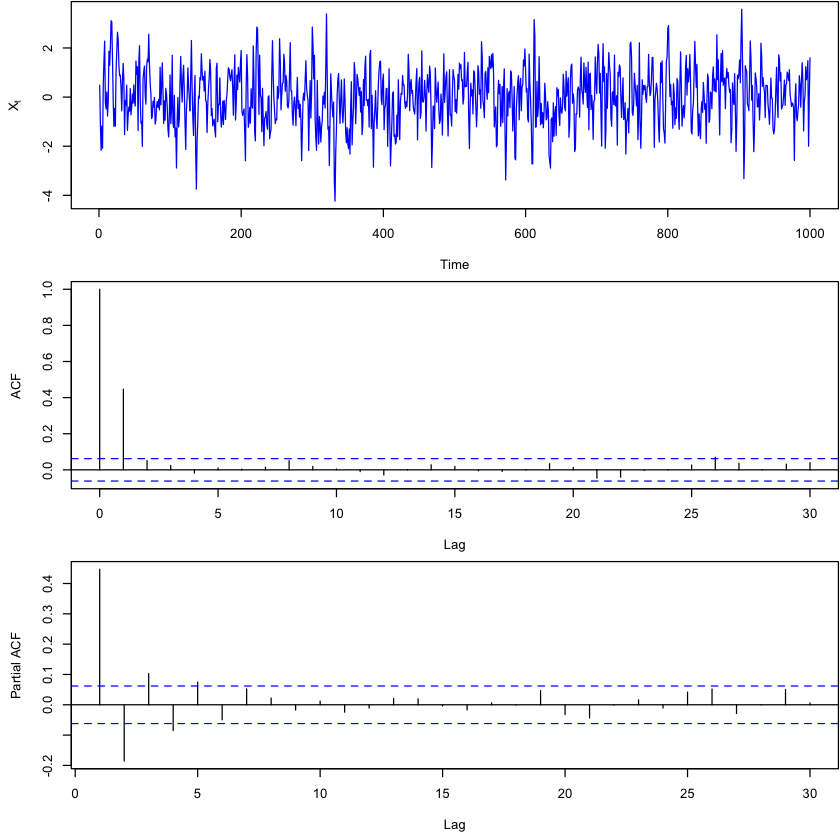

In [31]:
# Number of observations (with extra 50 discarded at start)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate a time series using a finite impulse response filter with coefficients 1 and 0.6
# Using sides=1 means the filter is one-sided (causal)
Yt <- filter(Wt, sides = 1, filter = c(1, 0.6))[-(1:50)]

# Set up plotting layout: 3 rows, 1 column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the filtered time series
plot.ts(Yt, col = "blue", ylab = expression(X[t]))

# Plot autocorrelation function (ACF)
acf(Yt, type = "correlation")

# Plot partial autocorrelation function (PACF)
acf(Yt, type = "partial")


An realization of ARIMA(0, 1, 1).

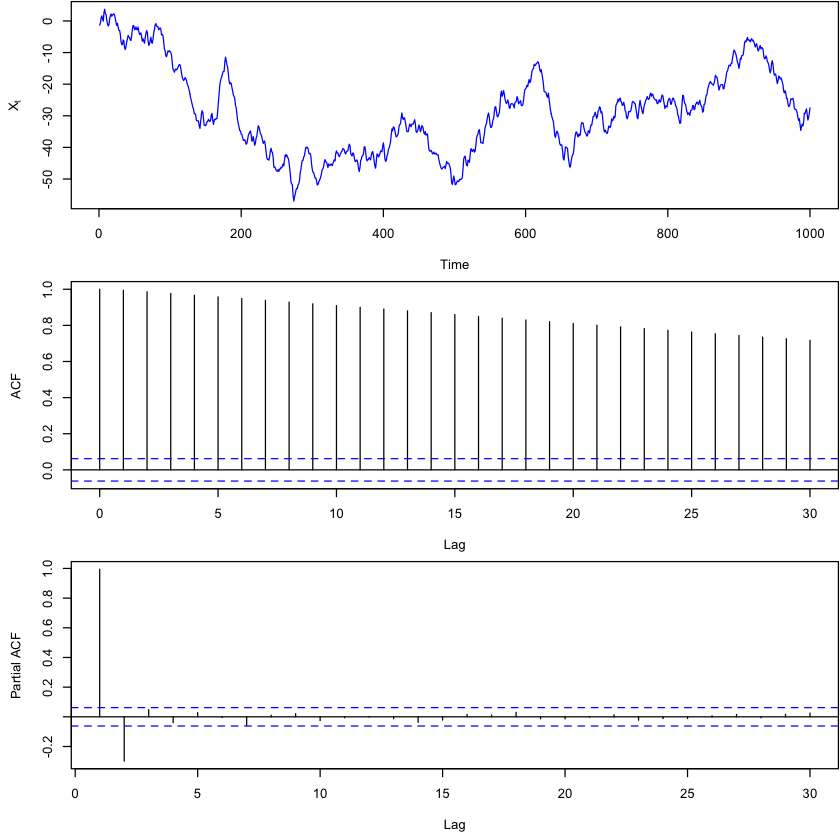

In [32]:
# Number of observations (extra 50 discarded for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate an MA(1)-type process using a one-sided filter with coefficients 1 and 0.6
Yt <- filter(Wt, sides = 1, filter = c(1, 0.6))[-(1:50)]

# Create an integrated series by cumulative summation of Yt
Xt <- cumsum(Yt)

# Set up plotting area: 3 rows, 1 column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the integrated time series Xt
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF) of Xt
acf(Xt, type = "correlation")

# Plot the partial autocorrelation function (PACF) of Xt
acf(Xt, type = "partial")


### Example 7.4

$\{X_t\}$ is an ARIMA(0, 1, $q$) process, then

$$(1 - B)X_t = \theta(B) W_t, \quad \{W_t\} \sim WN(0, \sigma^2).$$

We can write

$$Y_t = \theta(B) W_t,$$

which is an MA($q$), thus

$$
X_t = X_0 + \sum_{j=1}^t \theta(B) W_j = X_0 + \sum_{j=1}^t (W_j + \theta W_{j-1}).
$$

---

### Example 7.5

Moreover, if $\{X_t\}$ is an ARIMA($p$, 1, $q$), based on the causality assumption, we can write

$$
Y_t = (1 - B) X_t = \sum_{j=0}^\infty \psi_j W_{t-j},
$$

where $\psi(z) = \frac{\theta(z)}{\phi(z)}$. Then recursively,

$$
X_t = X_0 + \sum_{j=1}^t Y_j.
$$

---

### Example 7.6

What if $d = 2$? For ARIMA($p$, 2, $q$), we have

$$
\phi(B)(1 - B)^2 X_t = \theta(B) W_t,
$$

then

$$
(1 - B)^2 X_t = Z_t = \psi(B) W_t,
$$

where $\psi(z) = \frac{\theta(z)}{\phi(z)}$ is ARMA($p, q$). Letting $(1 - B) Y_t = Z_t$, we have

$$
(1 - B) Y_t = Z_t.
$$

Thus $\{Y_t\}$ is an ARIMA($p$, 1, $q$) and

$$
Y_t = Y_0 + \sum_{j=1}^t Z_j.
$$

Since $(1 - B) X_t = Y_t$, we further have

$$
X_t = X_0 + \sum_{j=1}^t Y_j.
$$

Notice that for any constants $\alpha_0$ and $\alpha_1$,

$$
X_t^* = X_t + \alpha_0 + \alpha_1 t
$$

is also a solution to the equation

$$
\phi(B)(1 - B)^2 X_t = \theta(B) W_t.
$$


An realization of ARIMA(1, 2, 0).

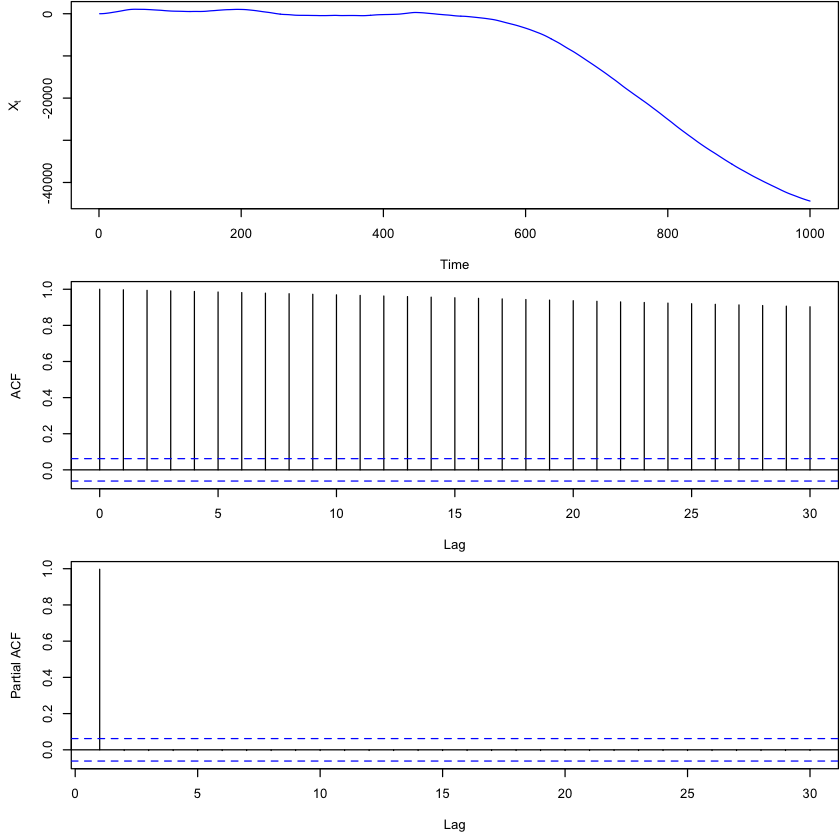

In [33]:
# Number of observations (with 50 discarded for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate an AR(1) process with coefficient 0.6 (recursive filtering)
Yt <- filter(Wt, filter = c(0.6), method = "recursive")[-(1:50)]

# Double integration (cumulative sum twice) of the AR(1) series
Xt <- cumsum(cumsum(Yt))

# Set up plotting area: 3 rows, 1 column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the doubly integrated process Xt
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot autocorrelation function (ACF)
acf(Xt, type = "correlation")

# Plot partial autocorrelation function (PACF)
acf(Xt, type = "partial")


An realization of ARIMA(0, 2, 1).

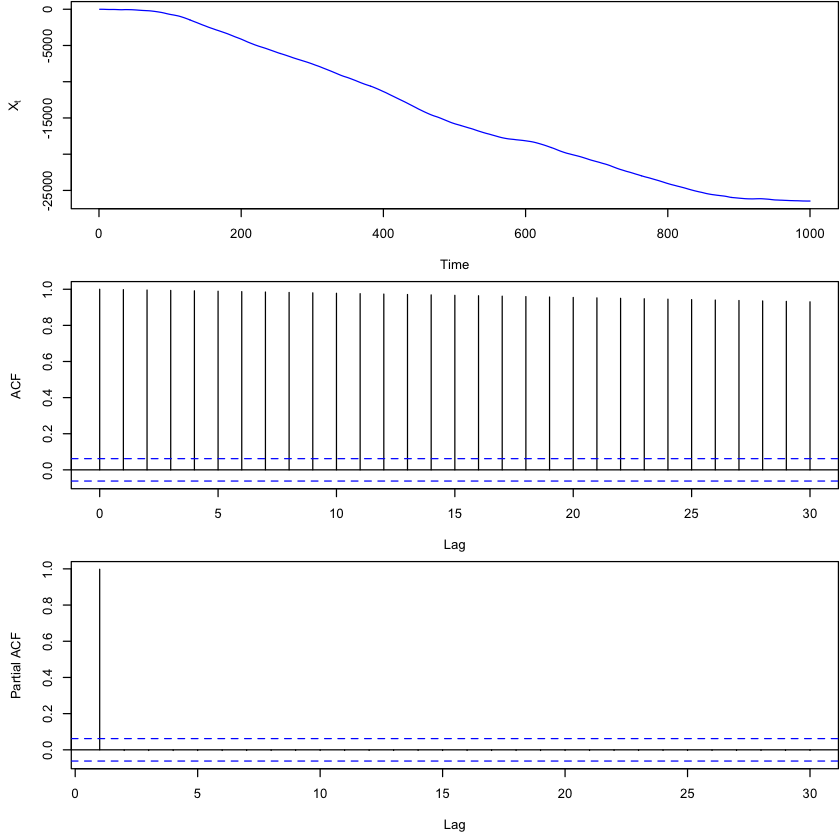

In [34]:
# Number of observations, with extra 50 to discard initial filter effects
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Generate MA(1) process with filter coefficients 1 and 0.6 (one-sided filter)
Yt <- filter(Wt, sides = 1, filter = c(1, 0.6))[-(1:50)]

# Double integration of the MA(1) process (cumulative sum twice)
Xt <- cumsum(cumsum(Yt))

# Set up plotting: 3 rows, 1 column
par(mfrow = c(3, 1))
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Plot the doubly integrated time series
plot.ts(Xt, col = "blue", ylab = expression(X[t]))

# Plot the autocorrelation function (ACF)
acf(Xt, type = "correlation")

# Plot the partial autocorrelation function (PACF)
acf(Xt, type = "partial")


## 7.2 Over-differencing?

While differencing a time series often seems to yield a series visually more amenable to modeling as a stationary process, **over-differencing is a danger!**

If $X_t$ is ARMA($p, q$) already, and satisfies

$$
\phi(B) X_t = \theta(B) W_t,
$$

then one more differencing provides that

$$
(1 - B) \phi(B) X_t = (1 - B) \theta(B) W_t,
$$

or equivalently,

$$
\phi(B) (1 - B) X_t = \theta(B) (1 - B) W_t;
$$

i.e., one more difference of $X_t$, denoted by $Y_t = \nabla X_t$, satisfies

$$
\phi(B) Y_t = \theta^*(B) W_t,
$$

where $\theta^*(z) = \theta(z)(1 - z)$. Noting that $\theta^*(z)$ has a root on the unit circle, thus $Y_t$ is a **non-invertible** ARMA($p, q+1$) process.

### Summary of evils of over-differencing:

1. ARMA($p, q+1$) model usually has more complex covariance structure than ARMA($p, q$).
2. ARMA($p, q+1$) model has one more parameter to estimate than ARMA($p, q$) model.
3. Sample size is reduced by 1 (from $n$ to $n-1$, not a big issue you may think...).

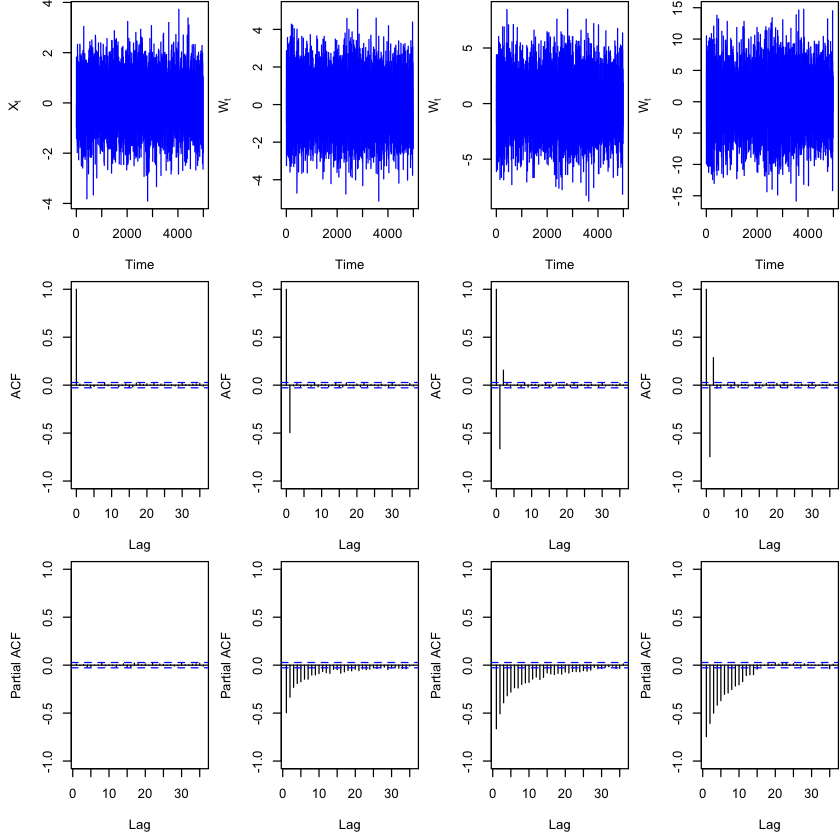

In [35]:
# Number of observations
N <- 5000

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Define a 3x4 layout matrix for plotting (positions 1 to 12)
design.mat <- matrix(1:12, nrow = 3, ncol = 4)
layout(design.mat)

# Plot white noise time series
plot.ts(Wt, col = "blue", ylab = expression(X[t]))

# Plot ACF and PACF of white noise with y-limits -1 to 1
acf(Wt, type = "correlation", ylim = c(-1, 1))
acf(Wt, type = "partial", ylim = c(-1, 1))

# First difference: Xt = Wt[t] - Wt[t-1]
Xt <- Wt[-1] - Wt[-length(Wt)]

# Plot first difference
plot.ts(Xt, col = "blue", ylab = expression(W[t]))

# Plot ACF and PACF of first difference
acf(Xt, type = "correlation", ylim = c(-1, 1))
acf(Xt, type = "partial", ylim = c(-1, 1))

# Second difference: Xt = Xt[t] - Xt[t-1]
Xt <- Xt[-1] - Xt[-length(Xt)]

# Plot second difference
plot.ts(Xt, col = "blue", ylab = expression(W[t]))

# Plot ACF and PACF of second difference
acf(Xt, type = "correlation", ylim = c(-1, 1))
acf(Xt, type = "partial", ylim = c(-1, 1))

# Third difference: Xt = Xt[t] - Xt[t-1]
Xt <- Xt[-1] - Xt[-length(Xt)]

# Plot third difference
plot.ts(Xt, col = "blue", ylab = expression(W[t]))

# Plot ACF and PACF of third difference
acf(Xt, type = "correlation", ylim = c(-1, 1))
acf(Xt, type = "partial", ylim = c(-1, 1))


Unit root tests help determine if differencing is needed. For example, suppose $X_t$ obeys an ARIMA(0, 1, 0) model:

$$(1 - B) X_t = W_t,$$

where $\{W_t\}$ is white noise.


This can be viewed as a special case of an AR(1) process as

$$(1 - \phi B) X_t = W_t,$$

where $\phi = 1$.

Thus, we can design a test for the null hypothesis $\phi = 1$. However, the maximum likelihood estimation (MLE) inference only holds for $|\phi| < 1$; i.e., when the process is causal.

Dickey and Fuller (1979) designed an alternative test statistic. They use ordinary least squares (OLS) to estimate $\phi^* = \phi - 1$, and then test the hypothesis $\phi^* = 0$. The method is based on the equation:

$$
\begin{aligned}
\nabla X_t &= X_t - X_{t-1} \\
&= (\phi X_{t-1} + W_t) - X_{t-1} \\
&= (\phi - 1) X_{t-1} + W_t \\
&= \phi^* X_{t-1} + W_t.
\end{aligned}
$$

Thus, the **Dickey-Fuller unit root test** uses OLS to regress $\nabla X_t$ on $X_{t-1}$.

---

**Note:** If the mean of $X_t$ is $\mu$ (not zero), then we have

$$
\nabla X_t = \phi^*_0 + \phi^*_1 X_{t-1} + W_t,
$$

where

- $\phi^*_0 = \mu (1 - \phi)$,
- $\phi^*_1 = \phi - 1$.

The goal is now to test

$$
H_0 : \phi^*_1 = 0 \quad \text{versus} \quad H_a : \phi^*_1 < 0,
$$

since we do not need to consider $\phi^*_1 > 0$ (which corresponds to a non-causal AR(1) model).

---

In the standard regression model

$$
Y_t = a + b Z_t + e_t, \quad t = 1, \ldots, m,
$$

minimizing the least squares

$$
\sum_t (Y_t - a - b Z_t)^2
$$

yields the OLS estimator of $b$ as

$$
\hat{b} = \frac{\sum_t (Y_t - \bar{Y})(Z_t - \bar{Z})}{\sum_t (Z_t - \bar{Z})^2} = \frac{\sum_t Y_t (Z_t - \bar{Z})}{\sum_t (Z_t - \bar{Z})^2},
$$

and the estimator of $a$ as

$$
\hat{a} = \bar{Y} - \hat{b} \bar{Z},
$$

where $\bar{Y}$ and $\bar{Z}$ are the sample means of the $Y_t$ s and $Z_t$ s respectively.

The standard error of $\hat{b}$ is

$$
SE(\hat{b}) = \sqrt{\frac{\sum_t (Y_t - \hat{a} - \hat{b} Z_t)^2}{(m-2) \sum_t (Z_t - \bar{Z})^2}}.
$$


Now, denote our model as

$$
\nabla X_t = X_t - X_{t-1} = \phi_0^* + \phi_1^* X_{t-1} + W_t, \quad t = 2, \ldots, n.
$$

Define 

$$
Y_t = X_t - X_{t-1} \quad \text{and} \quad Z_t = X_{t-1}.
$$

We have a regression model

$$
Y_t = \phi_0^* + \phi_1^* Z_t + W_t, \quad t = 2, \ldots, n.
$$

Then,

$$
\bar{Z} = \frac{1}{n-1} \sum_{t=2}^n Z_t = \frac{1}{n-1} \sum_{t=2}^n X_{t-1} = \frac{1}{n-1} \sum_{t=1}^{n-1} X_t.
$$

The OLS estimator of $\phi_1^*$ is

$$
\hat{\phi}_1^* = \frac{\sum_{t=2}^n Y_t (Z_t - \bar{Z})}{\sum_{t=2}^n (Z_t - \bar{Z})^2} 
= \frac{\sum_{t=2}^n (X_t - X_{t-1})(X_{t-1} - \bar{Z})}{\sum_{t=2}^n (X_{t-1} - \bar{Z})^2}.
$$

Rewrite the numerator:

$$
\begin{aligned}
\sum_{t=2}^n (X_t - X_{t-1})(X_{t-1} - \bar{Z}) &= \sum_{t=2}^n \big( (X_t - \bar{Z}) - (X_{t-1} - \bar{Z}) \big) (X_{t-1} - \bar{Z}) \\
&= \sum_{t=2}^n (X_t - \bar{Z})(X_{t-1} - \bar{Z}) - \sum_{t=2}^n (X_{t-1} - \bar{Z})^2,
\end{aligned}
$$

so

$$
\hat{\phi}_1^* = \frac{\sum_{t=2}^n (X_t - \bar{Z})(X_{t-1} - \bar{Z})}{\sum_{t=2}^n (X_{t-1} - \bar{Z})^2} - 1.
$$

---

The standard error of $\hat{\phi}_1^*$ is

$$
SE(\hat{\phi}_1^*) = \sqrt{\frac{\sum_{t=2}^n \left( \nabla X_t - \hat{\phi}_0^* - \hat{\phi}_1^* X_{t-1} \right)^2}{(n - 3) \sum_{t=2}^n (X_{t-1} - \bar{Z})^2}}.
$$

Further, 

$$
\hat{\phi}_0^* = \bar{Y} - \hat{\phi}_1^* \bar{Z} = \frac{X_n - X_1}{n - 1} - \hat{\phi}_1^* \frac{1}{n-1} \sum_{t=1}^{n-1} X_t.
$$

---

The test statistic for 

$$
H_0 : \phi_1^* = 0 \quad \text{versus} \quad H_a : \phi_1^* < 0
$$

is the t-like ratio

$$
t = \frac{\hat{\phi}_1^*}{SE(\hat{\phi}_1^*)}.
$$

However, this $t$ does **not** follow a standard $t$-distribution. We reject the null hypothesis (presence of a unit root) in favor of the alternative (AR(1) is appropriate) at level $\alpha$ if $t$ falls below the critical value from the Dickey-Fuller distribution, which assumes large $n$. The common critical values are:

| Significance Level | Critical Value |
|--------------------|----------------|
| 1%                 | -3.43          |
| 5%                 | -2.86          |
| 10%                | -2.57          |


# 7.3 Seasonal ARIMA Models

The classical decomposition of the time series

$$
X_t = m_t + s_t + Y_t,
$$

where $m_t$ is the trend component, $ s_t$ is the seasonal component, and $Y_t$ is the random noise component. We have learned to use differencing to eliminate the trend $m_t$. (Why? One easy way to interpret that is that we can view $m_t$ as a smooth function of $t$. Then any smooth function can be approximated by a polynomial; i.e., there exist $d$, $\alpha_0, \ldots, \alpha_d$ such that

$$
m_t \approx \sum_{k=0}^d \alpha_k t^k.
$$

Then

$$
X_t = \sum_{k=0}^d \alpha_k t^k + S_t + Y_t.
$$

Taking $d$-order differencing, we have

$$
\nabla^d X_t = \alpha_d + \nabla^d S_t + \nabla^d Y_t.
$$

Further,

$$
\nabla^{d+1} X_t = \nabla^{d+1} S_t + \nabla^{d+1} Y_t.
$$

Thus, the trend has been eliminated.) In this section, we learn how to handle seasonal components.

---

## 7.3.1 Seasonal ARMA models

Seasonal models allow for randomness in the seasonal pattern from one cycle to the next. For example, we have $r$ years of monthly data which we tabulate as follows:

| Year | Jan. | Feb. | ··· | Dec. |
|-------|------|------|-----|-------|
| 1     | $X_1$  | $X_2$  | ··· | $X_{12}$  |
| 2     | $X_{13}$ | $X_{14}$ | ··· | $X_{24}$  |
| 3     | $X_{25}$ | $X_{26}$ | ··· | $X_{36}$  |
| ...   | ...  | ...  | ... | ...   |
| $r$   | $X_{1+12(r-1)}$ | $X_{2+12(r-1)}$ | ··· | $X_{12+12(r-1)}$ |

Each column in this table may itself be viewed as a realization of a time series. Suppose that each one of these twelve time series is generated by the same $ARMA(P, Q)$ model, or more specifically that the series corresponding to the $j$th month,

$$
\{X_{j + 12t}, \quad t = 0, 1, \ldots, r-1\}
$$


satisfies

$$
X_{j+12t} = \Phi_1 X_{j+12(t-1)} + \cdots + \Phi_p X_{j+12(t-P)} + U_{j+12t} + \Theta_1 U_{j+12(t-1)} + \cdots + \Theta_Q U_{j+12(t-Q)}
$$

where 

$$
\{U_{j+12t}, \quad t = \ldots, -1, 0, 1, \ldots \} \sim WN(0, \sigma_U^2)
$$

holds for each $j = 1, \ldots, 12$. Since the same $ARMA(P, Q)$ model is assumed to apply to each month, we can rewrite it as

$$
X_t = \Phi_1 X_{t-12} + \cdots + \Phi_P X_{t-12P} + U_t + \Theta_1 U_{t-12} + \cdots + \Theta_Q U_{t-12Q}
$$

or

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) U_t,
$$

(7.1)

where 

$$
\Phi(z) = 1 - \Phi_1 z - \cdots - \Phi_p z^p, \quad \Theta(z) = 1 + \Theta_1 z + \cdots + \Theta_Q z^Q,
$$

and 

$$
\{U_{j+12t}, \quad t = \ldots, -1, 0, 1, \ldots \} \sim WN(0, \sigma_U^2)
$$

for each $j$. Now, for simplicity, we assume

$$
U_t \sim WN(0, \sigma^2),
$$

then we have $X_t$ as an ARMA process:

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

Or more generally,

$$
\Phi(B^{s}) X_t = \Theta(B^{s}) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

We call this model a Seasonal ARMA (SARMA) process with period $ s$ (an integer), denoted by $ARMA(P, Q)_s$.

If $\Phi(z)$ and $\Theta(z)$ make a stationary $ARMA(P, Q)$, then $X_t$ is also a stationary ARMA process.

---

What would an $ARMA(1,1)_4$ look like?

$$
(1 - \Phi_1 B^4) X_t = (1 + \Theta_1 B^4) W_t
$$

which is

$$
X_t = \Phi_1 X_{t-4} + W_t + \Theta_1 W_{t-4};
$$

i.e., a regular $ARMA(4,4)$ model (with certain coefficients being zero).

Now, let us think about a monthly model and a seasonal MA; i.e., $ARMA(0,1)_{12}$. The model can be written as

$$
X_t = W_t + \Theta_1 W_{t-12}.
$$

Obviously, it is causal and stationary. Then

$$
\gamma_X(h) = E(X_t X_{t+h}) = E\big((W_t + \Theta_1 W_{t-12})(W_{t+h} + \Theta_1 W_{t+h-12})\big) = (1 + \Theta_1^2) \sigma^2 I(h=0) + \Theta_1 \sigma^2 I(h=12).
$$


Thus, we should see one spike at lag 0 and also at 12.

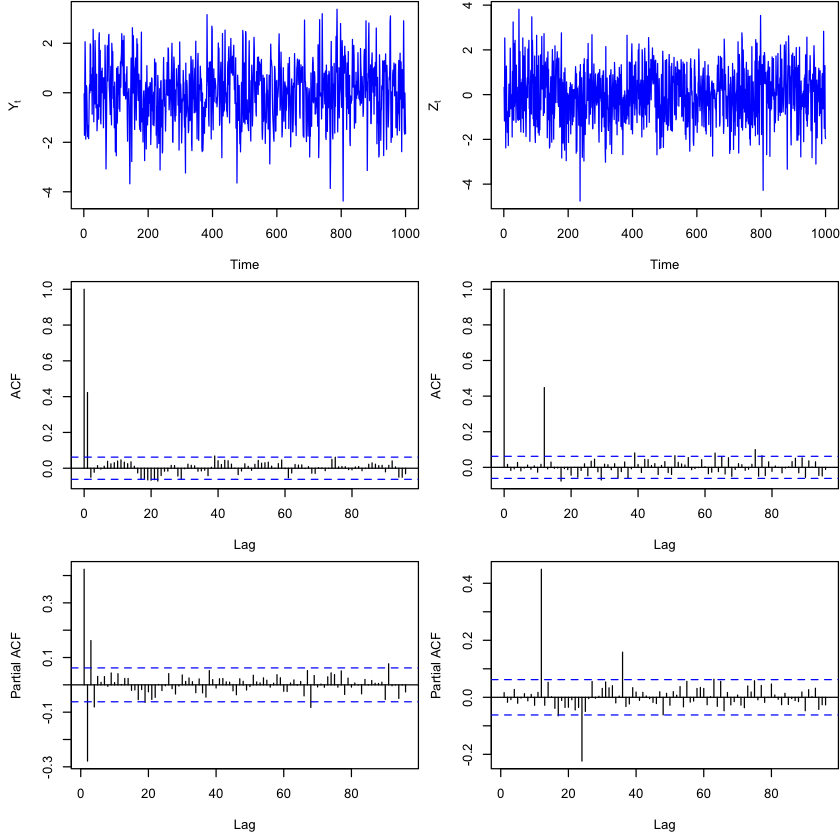

In [36]:
# Number of observations (with extra 50 for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Define layout matrix for 3 rows and 2 columns (6 plots)
design.mat <- matrix(1:6, nrow = 3, ncol = 2)
layout(design.mat)

# Generate MA(1) process with filter coefficients (1, 0.6)
Yt <- filter(Wt, sides = 1, filter = c(1, 0.6))[-(1:50)]

# Plot Yt time series
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))

# Plot ACF and PACF of Yt with lag up to 96
acf(Yt, type = "correlation", lag.max = 96)
acf(Yt, type = "partial", lag.max = 96)

# Generate MA(12) process with coefficients 1 and 0.6 at lag 13
Zt <- filter(Wt, sides = 1, filter = c(1, rep(0, 11), 0.6))[-(1:50)]

# Plot Zt time series
plot.ts(Zt, col = "blue", ylab = expression(Z[t]))

# Plot ACF and PACF of Zt with lag up to 96
acf(Zt, type = "correlation", lag.max = 96)
acf(Zt, type = "partial", lag.max = 96)


Now, let us check a seasonal AR; i.e., $ARMA(1, 0)_{12}$; i.e.,

$$
X_t = \Phi_1 X_{t-12} + W_t.
$$

Similarly as in the analysis of AR(1) process, we have, recursively,

\begin{aligned}
X_t &= \Phi_1 X_{t-12} + W_t = \Phi_1^2 X_{t-24} + \Phi_1 W_{t-12} + W_t \\
&= \cdots \\
&= \sum_{j=0}^\infty \Phi_1^j W_{t-12j}.
\end{aligned}

Thus,

$$
\gamma_X(0) = \sum_{j=0}^\infty \Phi_1^{2j} \sigma^2 = \frac{\sigma^2}{1 - \Phi_1^2}.
$$

What about $\gamma_X(1), \gamma_X(2), \ldots, \gamma_X(11)$? They are all zero.

And

\begin{aligned}
\gamma_X(12) &= E\left(\sum_{j=0}^\infty \Phi_1^j W_{t-12j} \right)
\left(\sum_{j=0}^\infty \Phi_1^j W_{t+12 - 12j} \right) \\
&= E\left(\sum_{j=0}^\infty \Phi_1^j W_{t-12j}\right)
\left(W_{t+12} + \Phi_1 \sum_{j=1}^\infty \Phi_1^{j-1} W_{t - 12(j-1)} \right) \\
&= E\left(\sum_{j=0}^\infty \Phi_1^j W_{t-12j} \right)
\left(W_{t+12} + \Phi_1 \sum_{j=0}^\infty \Phi_1^j W_{t - 12j} \right) \\
&= \Phi_1 \sum_{j=0}^\infty \Phi_1^{2j} \sigma^2 = \frac{\sigma^2 \Phi_1}{1 - \Phi_1^2}.
\end{aligned}

Further,

$$
\gamma_X(h) = \sigma^2 \sum_{\text{integer } k} \frac{\Phi_1^k}{1 - \Phi_1^2} I(h = 12k).
$$

This is very similar to an AR(1), however, we are ignoring all the lags between multiples of 12. We are not worried about what is going on at 1, 2, 3, 4, $\ldots$, we are only interested in the lags 12, 24, 36, $\ldots$.

You can certainly generalize it to a general period, like $ARMA(1, 0)_s$, for any integer $ s$.


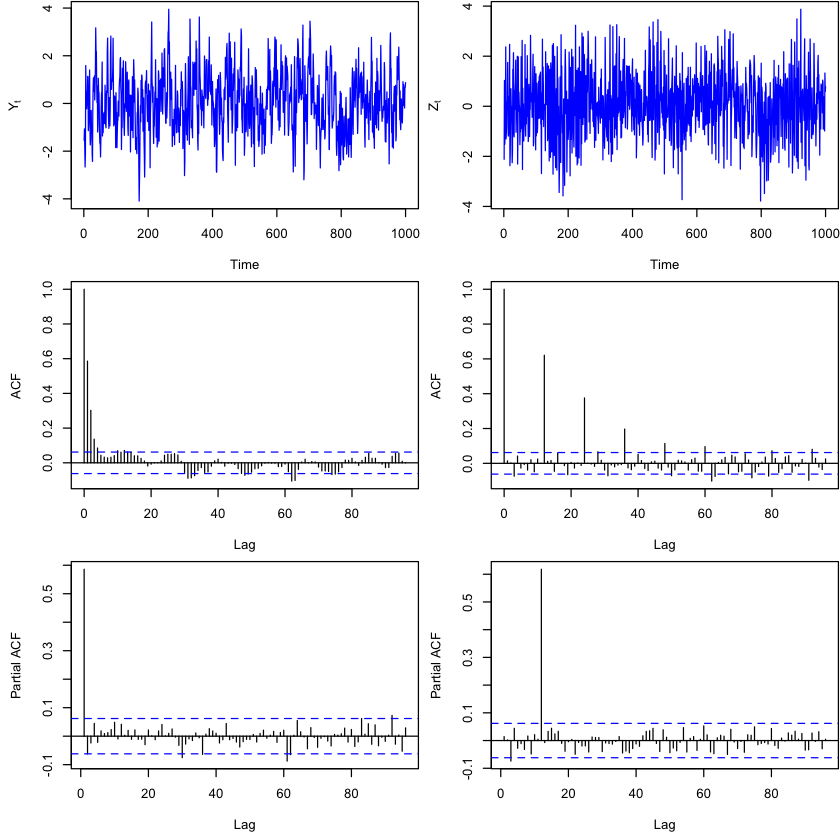

In [37]:
# Number of observations (with extra 50 discarded for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Define layout matrix for 3 rows and 2 columns (6 plots)
design.mat <- matrix(1:6, nrow = 3, ncol = 2)
layout(design.mat)

# Generate AR(1) process with coefficient 0.6 using recursive filter
Yt <- filter(Wt, filter = c(0.6), method = "recursive")[-(1:50)]

# Plot Yt time series
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))

# Plot ACF and PACF of Yt with maximum lag 96
acf(Yt, type = "correlation", lag.max = 96)
acf(Yt, type = "partial", lag.max = 96)

# Generate AR(12) process with a single non-zero coefficient at lag 12 (0.6)
Zt <- filter(Wt, filter = c(rep(0, 11), 0.6), method = "recursive")[-(1:50)]

# Plot Zt time series
plot.ts(Zt, col = "blue", ylab = expression(Z[t]))

# Plot ACF and PACF of Zt with maximum lag 96
acf(Zt, type = "correlation", lag.max = 96)
acf(Zt, type = "partial", lag.max = 96)


It is unlikely that the 12 series (in columns) corresponding to the different months are uncorrelated.
To incorporate dependence between these series, we assume now that the ${U_t}$ sequence follows an
ARMA $(p, q)$ model,

$$
\phi(B) U_t = \theta(B) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

Then we have

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) U_t = \Theta(B^{12}) \phi^{-1}(B) \theta(B) W_t,
$$

which implies

$$
\phi(B) \Phi(B^{12}) X_t = \theta(B) \Theta(B^{12}) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

More generally, we have the SARMA model as
$ARMA(p, q) \times (P, Q)_s$,
written as

$$
\phi(B) \Phi(B^{s}) X_t = \theta(B) \Theta(B^{s}) W_t, \quad W_t \sim WN(0, \sigma^2),
$$

where

$$
\phi(z) = 1 - \phi_1 z - \cdots - \phi_p z^p, \quad \Phi(z) = 1 - \Phi_1 z - \cdots - \Phi_P z^P,
$$

$$
\theta(z) = 1 + \theta_1 z + \cdots + \theta_q z^q, \quad \text{and} \quad \Theta(z) = 1 + \Theta_1 z + \cdots + \Theta_Q z^Q.
$$

For example, consider ARMA $(0, 1) \times (0, 1)_{12}$ ; i.e.,

$$
X_t = (1 + \theta_1 B)(1 + \Theta_1 B^{12}) W_t = W_t + \theta_1 W_{t-1} + \Theta_1 W_{t-12} + \theta_1 \Theta_1 W_{t-13}.
$$


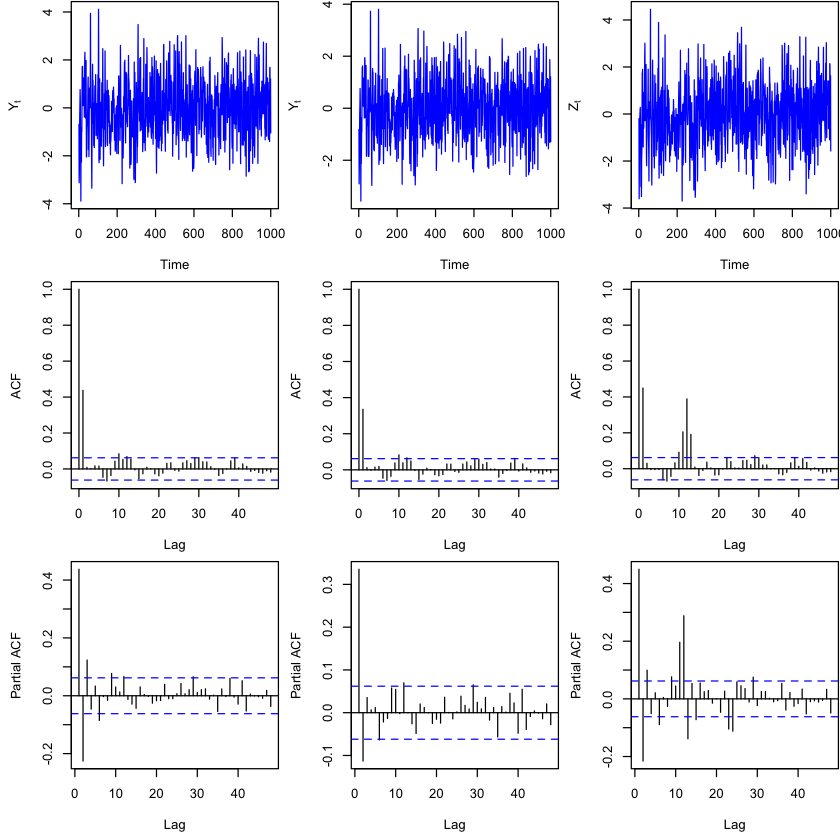

In [38]:
# Number of observations (with extra 50 discarded for initialization)
N <- 1050

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Define layout matrix for 3 rows and 3 columns (9 plots)
design.mat <- matrix(1:9, nrow = 3, ncol = 3)
layout(design.mat)

# MA(1) process with theta = 0.6
Yt <- filter(Wt, sides = 1, filter = c(1, 0.6))[-(1:50)]
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))
acf(Yt, type = "correlation", lag.max = 48)
acf(Yt, type = "partial", lag.max = 48)

# MA(1) process with theta = 0.4
Yt <- filter(Wt, sides = 1, filter = c(1, 0.4))[-(1:50)]
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))
acf(Yt, type = "correlation", lag.max = 48)
acf(Yt, type = "partial", lag.max = 48)

# SARMA(0,1)*(0,1)_12 with theta=0.6 and Theta=0.4
# Filter coefficients: MA(1) coeff 0.6 at lag 1, seasonal MA(1) coeff 0.4 at lag 12
# The product term 0.6 * 0.4 = 0.24 at lag 13
Zt <- filter(Wt, sides = 1, filter = c(1, 0.6, rep(0, 10), 0.4, 0.24))[-(1:50)]
plot.ts(Zt, col = "blue", ylab = expression(Z[t]))
acf(Zt, type = "correlation", lag.max = 48)
acf(Zt, type = "partial", lag.max = 48)


**What is an ARMA(1, 1) × (1, 1)$_{12}$?**

The model is written as

$$
(1 - \phi_1 B)(1 - \Phi_1 B^{12}) X_t = (1 + \theta_1 B)(1 + \Theta_1 B^{12}) W_t,
$$

which expands to

$$
X_t - \phi_1 X_{t-1} - \Phi_1 X_{t-12} + \phi_1 \Phi_1 X_{t-13} = W_t + \theta_1 W_{t-1} + \Theta_1 W_{t-12} + \theta_1 \Theta_1 W_{t-13}.
$$

Things get messy, especially when you start dealing with higher orders or more seasonal components.


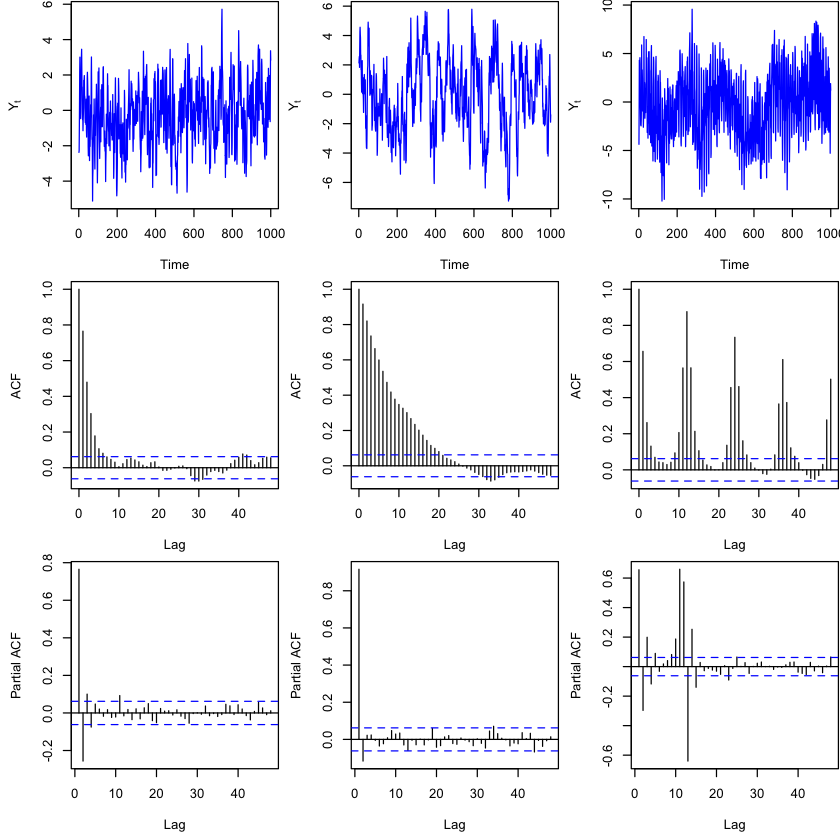

In [39]:
# Number of observations
N <- 1000

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins
par(mar = c(4.5, 4.5, 0.1, 0.1))

# Define layout matrix for 3 rows and 3 columns (9 plots)
design.mat <- matrix(1:9, nrow = 3, ncol = 3)
layout(design.mat)

# ARMA(1,1) with phi = 0.6, theta = 0.4
Yt <- arima.sim(model = list(ar = 0.6, ma = 0.4), n = N)
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))
acf(Yt, type = "correlation", lag.max = 48)
acf(Yt, type = "partial", lag.max = 48)

# ARMA(1,1) with phi = 0.9, theta = 0.1
Yt <- arima.sim(model = list(ar = 0.9, ma = 0.1), n = N)
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))
acf(Yt, type = "correlation", lag.max = 48)
acf(Yt, type = "partial", lag.max = 48)

# Seasonal ARMA(1,1)*(1,1)_12 model
# phi = 0.6, Phi = 0.9, theta = 0.4, Theta = 0.1
# Seasonal AR coefficient at lag 12: 0.9
# Seasonal MA coefficient at lag 12: 0.1
# Interaction terms for AR and MA seasonal are included (e.g., -0.54, 0.04)
Yt <- arima.sim(
  model = list(
    ar = c(0.6, rep(0, 10), 0.9, -0.54),
    ma = c(0.4, rep(0, 10), 0.1, 0.04)
  ), 
  n = N
)
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))
acf(Yt, type = "correlation", lag.max = 48)
acf(Yt, type = "partial", lag.max = 48)


### 7.3.2 Seasonal ARIMA Models

From equation (7.1), we have

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) U_t,
$$

where initially $U_t$ is white noise.

Relaxing this, suppose $U_t$ follows an $ARMA(p, q)$ process, giving a Seasonal ARMA model. Now, consider $U_t$ follows an **ARIMA**$(p, d, q)$ process to account for possible trends in $U_t$, such as in monthly temperature data where there is a seasonal trend:

$$
\phi(B)(1 - B)^d U_t = \theta(B) W_t, \quad W_t \sim WN(0, \sigma^2). \tag{7.2}
$$

Then, for $X_t$, we have

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) U_t \implies \phi(B) \Phi(B^{12}) (1 - B)^d X_t = \Theta(B^{12}) \theta(B) W_t.
$$

More generally, with period $ s$,

$$
\phi(B) \Phi(B^{s}) \left\{ (1 - B)^d X_t \right\} = \theta(B) \Theta(B^{s}) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

---

Can we relax this further?

In equation (7.1), $X_t$ satisfies

$$
\Phi(B^{12}) X_t = \Theta(B^{12}) U_t,
$$

which assumes a stationary structure. But what if $X_t$ itself is **non-stationary** regardless of $U_t$? We then put an ARIMA structure on $X_t$ with a seasonal difference component, assuming

$$
\Phi(B^{12}) \left\{ (1 - B^{12})^{D} X_t \right\} = \Theta(B^{12}) U_t.
$$

Combining with (7.2), we get

$$
\Phi(B^{12}) \left\{ (1 - B^{12})^{D} X_t \right\} = \Theta(B^{12}) U_t \implies \phi(B) \Phi(B^{12}) (1 - B)^d (1 - B^{12})^{D} X_t = \theta(B) \Theta(B^{12}) W_t.
$$

---

### Generalizing period $ s = 12$ to any integer $ s$, we finally have the definition of a **Seasonal ARIMA (SARIMA)** model:

$$
\boxed{
\phi(B) \Phi(B^{s}) (1 - B)^d (1 - B^{s})^{D} X_t = \theta(B) \Theta(B^{s}) W_t, \quad W_t \sim WN(0, \sigma^2),
}
$$

where:

* $\phi(B) = 1 - \phi_1 B - \cdots - \phi_p B^p$ is the non-seasonal AR polynomial,
* $\theta(B) = 1 + \theta_1 B + \cdots + \theta_q B^q$ is the non-seasonal MA polynomial,
* $\Phi(B^s) = 1 - \Phi_1 B^s - \cdots - \Phi_P B^{Ps}$ is the seasonal AR polynomial,
* $\Theta(B^s) = 1 + \Theta_1 B^s + \cdots + \Theta_Q B^{Qs}$ is the seasonal MA polynomial,
* $d$ is the order of non-seasonal differencing,
* $D$ is the order of seasonal differencing,
* $ s$ is the seasonal period (e.g., 12 for monthly data).


### The $SARIMA(p, d, q) \times (P, D, Q)_s$ Process

If $d$ and $D$ are non-negative integers, then $\{X_t\}$ is said to be a seasonal $ARIMA(p, d, q) \times (P, D, Q)_s$ process with period $ s$ if the differenced process

$$
Y_t = (1 - B)^d (1 - B^s)^D X_t
$$

is a causal ARMA process satisfying

$$
\phi(B) \Phi(B^s) Y_t = \theta(B) \Theta(B^s) W_t, \quad W_t \sim WN(0, \sigma^2),
$$

where

$$
\begin{aligned}
\phi(z) &= 1 - \phi_1 z - \cdots - \phi_p z^p, \\
\Phi(z) &= 1 - \Phi_1 z - \cdots - \Phi_P z^P, \\
\theta(z) &= 1 + \theta_1 z + \cdots + \theta_q z^q, \\
\Theta(z) &= 1 + \Theta_1 z + \cdots + \Theta_Q z^Q.
\end{aligned}
$$

---

### Example: $SARIMA(0, 1, 1) \times (0, 1, 1)_{12}$

The model is

$$
(1 - B)(1 - B^{12}) X_t = (1 + \theta_1 B)(1 + \Theta_1 B^{12}) W_t,
$$

which expands to

$$
X_t - X_{t-1} - X_{t-12} + X_{t-13} = W_t + \theta_1 W_{t-1} + \Theta_1 W_{t-12} + \theta_1 \Theta_1 W_{t-13}.
$$


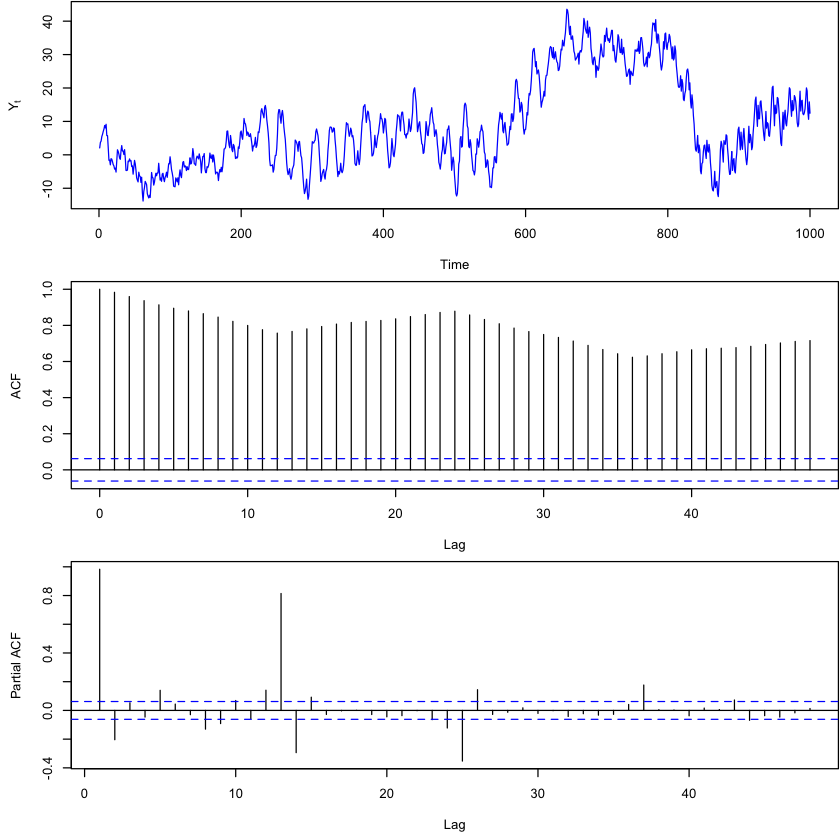

In [40]:
# Number of observations with extra for initialization
N <- 1100

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins and 3-row, 1-column plotting layout
par(mar = c(4.5, 4.5, 0.1, 0.1))
par(mfrow = c(3, 1))

# Step 1: Apply MA filter with coefficients at lag 1 and lag 12
# Coefficients: 1 (lag 0), 0.4 (lag 1), 0.6 (lag 12), and 0.24 (lag 13)
Yt <- filter(Wt, sides = 1, filter = c(1, 0.4, rep(0, 10), 0.6, 0.24))[-(1:50)]

# Step 2: Apply recursive AR filter with coefficients: 1, 0,...,0, -1 (lag 11), 1 (lag 12)
Yt <- filter(Yt, filter = c(1, rep(0, 10), -1, 1), method = "recursive")[-(1:50)]

# Plot the resulting series
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))

# Plot the autocorrelation function (ACF) up to lag 48
acf(Yt, type = "correlation", lag.max = 48)

# Plot the partial autocorrelation function (PACF) up to lag 48
acf(Yt, type = "partial", lag.max = 48)


### SARIMA $(1, 1, 0) \times (1, 1, 0)_{12}$

The model is:

$$
(1 - \phi_1 B)(1 - \Phi_1 B^{12})(1 - B)(1 - B^{12}) X_t = W_t.
$$

Expanding this, we get:

$$
\begin{aligned}
W_t =\ & X_t - (1 + \phi_1) X_{t-1} + \phi_1 X_{t-2} \\
& - (1 + \Phi_1) X_{t-12} + (1 + \phi_1 + \Phi_1 + \phi_1 \Phi_1) X_{t-13} - (\phi_1 + \phi_1 \Phi_1) X_{t-14} \\
& + \Phi_1 X_{t-24} - (\Phi_1 + \phi_1 \Phi_1) X_{t-25} + \phi_1 \Phi_1 X_{t-26}.
\end{aligned}
$$


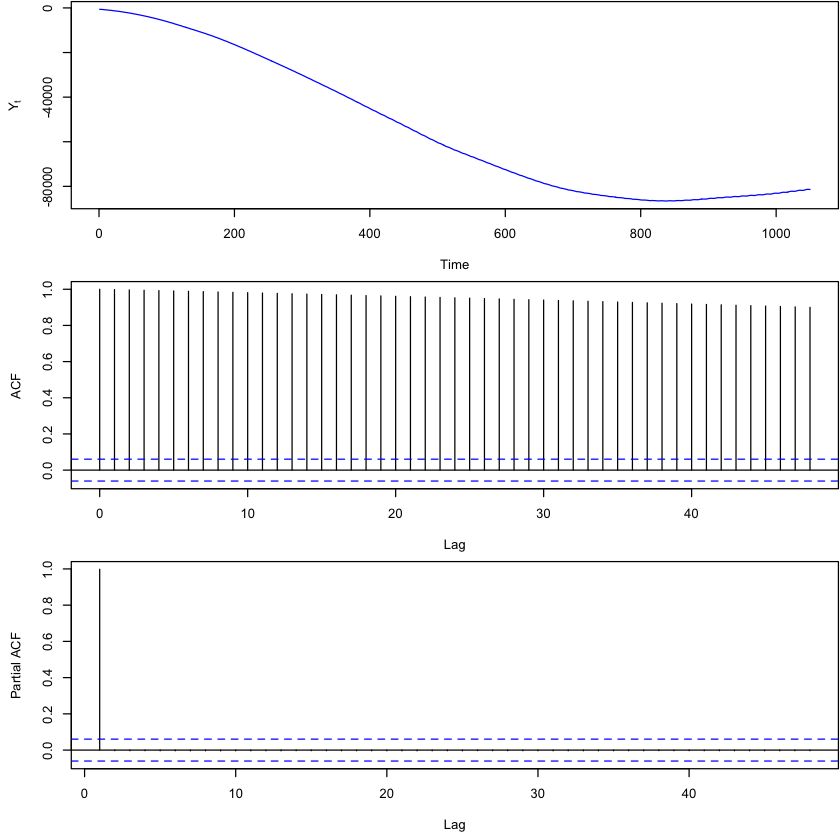

In [41]:
# Number of observations
N <- 1100

par(bg = "white")        

# Generate white noise
Wt <- rnorm(N, 0, 1)

# Set plot margins and layout (3 rows, 1 column)
par(mar = c(4.5, 4.5, 0.1, 0.1))
par(mfrow = c(3, 1))

# AR parameters
phi <- 0.9    # non-seasonal AR(1)
Phi <- 0.8    # seasonal AR(1) at lag 12

# Recursive filter coefficients for seasonal ARMA model
# Coefficients for AR polynomial:
# c(1 + phi, -phi, 0,..., 0, 1 + Phi, ..., -Phi, ...)
# The vector length corresponds to seasonal lag 12 effects included

coef_vec <- c(
  1 + phi,          # lag 0
  -phi,             # lag 1
  rep(0, 9),        # lags 2 to 10 zero
  1 + Phi,          # lag 11 (seasonal lag 12 - 1)
  -1 - phi - Phi - phi * Phi,  # lag 12
  phi + phi * Phi,            # lag 13
  rep(0, 9),        # lags 14 to 22 zero
  -Phi,             # lag 23 (seasonal lag 24 - 1)
  Phi + phi * Phi,  # lag 24
  -phi * Phi        # lag 25
)

# Apply recursive filter with the coefficient vector to simulate seasonal ARMA
Yt <- filter(Wt, filter = coef_vec, method = "recursive")[-(1:50)]

# Plot the time series
plot.ts(Yt, col = "blue", ylab = expression(Y[t]))

# Plot the autocorrelation function (ACF) up to lag 48
acf(Yt, type = "correlation", lag.max = 48)

# Plot the partial autocorrelation function (PACF) up to lag 48
acf(Yt, type = "partial", lag.max = 48)


### Seasonal ARIMA Model Parameter Specification and Estimation

* **Period $ s$** is usually set based on domain knowledge about the dataset:

  * For example:

    * Weather or climate data: $ s = 12$ (12 months per year)
    * Financial data: $ s = 4$ (4 quarters per year)
* The seasonal differencing order $D$ is rarely greater than 1 in practice.
* The seasonal AR and MA orders $P$ and $Q$ are commonly less than 3.

---

### Parameter Estimation

Given the orders $p, d, q, P, D, Q$, we estimate:

$$
\phi = (\phi_1, \ldots, \phi_p), \quad \theta = (\theta_1, \ldots, \theta_q), \quad \Phi = (\Phi_1, \ldots, \Phi_P), \quad \Theta = (\Theta_1, \ldots, \Theta_Q), \quad \sigma^2.
$$

Once $d$ and $D$ are fixed, define the differenced series:

$$
Y_t = (1 - B)^d (1 - B^s)^D X_t,
$$

which follows an ARMA $(p + sP, \ q + sQ)$ model, where some coefficients are zero and others are functions of $\phi, \theta, \Phi, \Theta$.

Thus, parameter estimation reduces to fitting an ARMA model to the differenced series $Y_t$, using methods such as Maximum Likelihood Estimation (MLE) or Conditional Least Squares.


### 7.4 Regression with Stationary Errors

Recall the classical decomposition model for a time series $\{Y_t\}$:

$$
Y_t = m_t + s_t + Z_t \quad (7.3)
$$

where

* $m_t$ is the **trend component**,
* $ s_t$ is the **periodic (seasonal) component** with known period $ s$, satisfying

  $$
  s_{t-s} = s_t \quad \text{for all integers } t,
  $$

  and

  $$
  \sum_{j=1}^s s_j = 0,
  $$
* $Z_t$ is a **stationary process with zero mean**.

Often, $m_t$ and $ s_t$ are treated as deterministic (non-random).
The SARIMA model can capture stochastic $ s_t$, and can also handle deterministic $m_t$ and $ s_t$ through differencing. However, differencing to remove deterministic $m_t$ or $ s_t$ can lead to **over-differencing** of $Z_t$, which is undesirable.

---

### Alternative Approach: Regression with Stationary Errors

Instead of differencing, model (7.3) can be treated as a **regression model with stationary errors**.

---

### Standard Linear Regression Model

$$
Y = X \beta + Z,
$$

where:

* $Y = (Y_1, \ldots, Y_n)^\top$ is the vector of responses,
* $X$ is an $n \times k$ matrix with rows $x_t^\top$, i.e.,

  $$
  X = \begin{pmatrix} x_1^\top \\ \vdots \\ x_n^\top \end{pmatrix},
  $$
* $\beta = (\beta_1, \ldots, \beta_k)^\top$ are the regression coefficients,
* $Z = (Z_1, \ldots, Z_n)^\top$ is a vector of white noise errors: $Z_t \sim WN(0, \sigma^2)$.

---

### Examples of Regressions

1. **Trend model:**

$$
Y_t = \beta_1 + \beta_2 t + Z_t,
$$

where the trend $m_t$ is modeled by the linear function $\beta_1 + \beta_2 t$.

2. **Seasonality model:**

$$
Y_t = \beta_1 + \beta_2 \cos(2\pi \delta t) + \beta_3 \sin(2\pi \delta t) + Z_t,
$$

which accounts for seasonal components with frequency $\delta$.

Both examples can be expressed as:

$$
Y = X \beta + Z.
$$

---

### Ordinary Least Squares (OLS) Estimation

The OLS estimator $\hat{\beta}_{\text{ols}}$ minimizes the sum of squared errors:

$$
S(\beta) = \sum_{t=1}^n (Y_t - x_t^\top \beta)^2 = (Y - X \beta)^\top (Y - X \beta).
$$

Setting the gradient $\nabla_\beta S(\beta) = 0$ yields the **normal equations**:

$$
X^\top X \hat{\beta} = X^\top Y.
$$


Since

$$
\hat{\beta}_{\text{ols}} = (X^\top X)^{-1} X^\top Y,
$$

provided that $X^\top X$ has full rank.

If $\{Z_t\}$ are white noise, then $\hat{\beta}_{\text{ols}}$ is the **best linear unbiased estimator (BLUE)** of $\beta$. This means that for any other unbiased estimator $\tilde{\beta}$,

$$
\operatorname{Var}(c^\top \hat{\beta}_{\text{ols}}) \leq \operatorname{Var}(c^\top \tilde{\beta})
$$

for any constant vector $c$. Furthermore, the covariance matrix of $\hat{\beta}_{\text{ols}}$ is

$$
\operatorname{Cov}(\hat{\beta}_{\text{ols}}) = \sigma^2 (X^\top X)^{-1}.
$$

---

### However, for time series:

**Uncorrelated errors** $Z_t$ are usually unrealistic. More realistically, the error term $\{Z_t\}$ comes from a **stationary process with zero mean**. For example, $\{Z_t\}$ might follow a causal ARMA(p, q) process:

$$
\phi(B) Z_t = \theta(B) W_t, \quad W_t \sim WN(0, \sigma^2).
$$

---

### What should we do in this case?

The solution is the **Generalized Least Squares (GLS)** estimator $\hat{\beta}_{\text{gls}}$, which minimizes the weighted sum of squares:

$$
S(\beta) = (Y - X\beta)^\top \Gamma_n^{-1} (Y - X\beta),
$$

where $\Gamma_n = \operatorname{Cov}(Z)$ is the covariance matrix of the error vector $Z = (Z_1, \ldots, Z_n)^\top$.

The solution is

$$
\hat{\beta}_{\text{gls}} = (X^\top \Gamma_n^{-1} X)^{-1} X^\top \Gamma_n^{-1} Y.
$$

---

### Why does this work?

Recall from the MLE derivation for ARMA(p, q) processes, the covariance matrix $\Gamma_n$ can be decomposed as

$$
\Gamma_n = C D C^\top,
$$

where $C$ and $D$ are matrices obtained from the covariance structure.

By multiplying both sides of the model by $D^{-1/2} C^{-1}$, we get

$$
D^{-1/2} C^{-1} Y = D^{-1/2} C^{-1} X \beta + D^{-1/2} C^{-1} Z.
$$

Now, the covariance of the transformed errors is

$$
\operatorname{Cov}(D^{-1/2} C^{-1} Z) = D^{-1/2} C^{-1} \Gamma_n (D^{-1/2} C^{-1})^\top = I_n,
$$

where $I_n$ is the $n \times n$ identity matrix.

---

### Hence, defining

$$
Y_e = D^{-1/2} C^{-1} Y, \quad X_e = D^{-1/2} C^{-1} X, \quad Z_e = D^{-1/2} C^{-1} Z,
$$

we have a transformed model

$$
Y_e = X_e \beta + Z_e, \quad \text{with } Z_e \sim WN(0, I_n).
$$

---

### By applying OLS to the transformed model, the estimator is

$$
\hat{\beta}_{\text{gls}} = (X_e^\top X_e)^{-1} X_e^\top Y_e = (X^\top \Gamma_n^{-1} X)^{-1} X^\top \Gamma_n^{-1} Y,
$$

which is the GLS estimator in the original model.


In principle, we can use MLE under a Gaussian assumption to estimate all parameters in the model

$$
Y = X\beta + Z.
$$

Note that all parameters include $\beta$ and the $ARMA(p, q)$ model for $Z$. However, in practice, the following iterative scheme for parameter estimation often works well:

1. Fit the model by OLS and obtain $\hat{\beta}_{ols}$;
2. Compute the residuals

   $$
   Y_t - x_t^\top \hat{\beta}_{ols};
   $$
3. Fit an $ARMA(p, q)$ or other stationary model to the residuals;
4. Using the fitted model, compute $\hat{\beta}_{gls}$ and form residuals

   $$
   Y_t - x_t^\top \hat{\beta}_{gls};
   $$
5. Fit the same model to the new residuals again;
6. Repeat steps 4 and 5 until parameter estimates have stabilized.
